Inserted sample sales data successfully.
    product  total_qty  revenue
0  Notebook        216  10800.0
1       Pen        378   1890.0
2    Pencil        810   1620.0


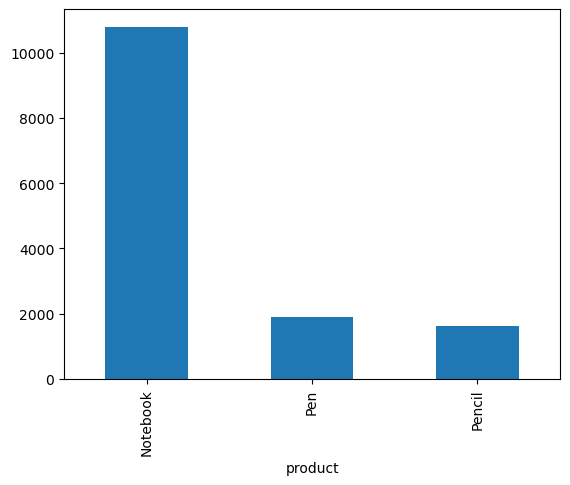

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# This is how you create your small SQLite database file.
conn = sqlite3.connect("sales_data.db")
# Creates a cursor object, which lets you send SQL commands (CREATE TABLE, INSERT, SELECT, etc.) to the database.
cur = conn.cursor()

# Sample sales rows (date, product, quantity, price)
sales_rows = [
    ("2025-08-01", "Pen", 10, 5.00),
    ("2025-08-01", "Notebook", 5, 50.00),
    ("2025-08-02", "Pen", 4, 5.00),
    ("2025-08-02", "Pencil", 20, 2.00),
    ("2025-08-03", "Notebook", 3, 50.00),
    ("2025-08-03", "Pencil", 10, 2.00),
]

cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT NOT NULL,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
""")

# Insert data
cur.executemany(
    "INSERT INTO sales(date, product, quantity, price) VALUES (?,?,?,?)",
    sales_rows
)
conn.commit()

print("Inserted sample sales data successfully.")\

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""
df = pd.read_sql_query(query, conn)
print(df)
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.show()
conn.close()
